# Exercise 3 - Geospatial data

In this exercise geospatial data will be visualized on a [cartopy](https://scitools.org.uk/cartopy/docs/latest/#) map. 
Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. Cartopy has built an interface to work with matplotlib. In principal a matplotlib figure will be given a new coordinate system, which enables you to plot geospatial data on top of it.

In [11]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
from cartopy.feature import ShapelyFeature
import cartopy.feature

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from owslib.wms import WebMapService

# Set standard size for figures
plt.rcParams["figure.figsize"]=20,7


## Creating  a map 
In this first example we will create a matplotlib figure with a certain axes and a projection (PlateCarree). [Here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#cartopy-projections) is a list of other projections that are available. The different projections all have arguments that can be used to change the settings of your projection. For example, with central_longitude and central_latitude you can change the center of the projected map. To give an idea of the world projection, we will use the [stock_img()](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.stock_img) function to add a standard image to the map.

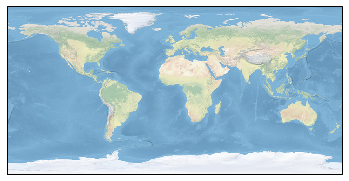

In [2]:
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.stock_img();

## Exercise 3.1
Using Cartopy create this image:

![alt text](../images/ex3-globe.png "Globe view with cartopy")



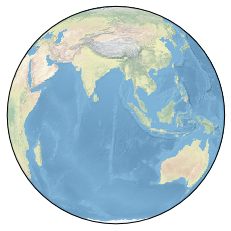

In [3]:
# Answer to ex 3.1
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=90))
ax.stock_img();

## Adjusting the axes

To zoom to a specific region, you need to set a certain extent.
You can adjust the matplotlib figure axes to zoom into that certain extent. In the example below we are using this extent: 
[-20, 60, -40, 40] (keep in mind that the extent is defined by: [min longitude, max longitude, min latitude, max latitude].
This can be done by using the 'set_extent' function. 
There are many other functions that can be used to adjust the figure. For example 'add_feature', which allows the user to add extra features to the map. These functions are listed [here](https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/geoaxes.html). In the following example we adjusted the axes to add the feature 'COASTLINE'. These are all features belonging to cartopy and by importing the cartopy package, we can directly use these. Example adopted from [here](https://scitools.org.uk/cartopy/docs/v0.15/examples/features.html).

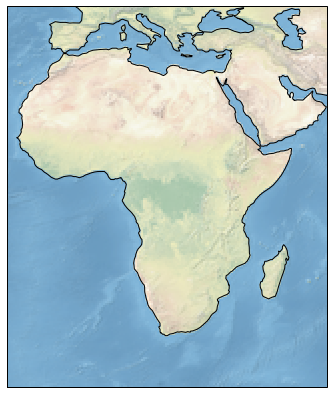

In [21]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img();

ax.add_feature(cartopy.feature.COASTLINE)

ax.set_extent([-20, 60, -40, 40])

## Exercise 3.2
Create a cartopy figure using the extent of the Netherlands. 
If you're having trouble finding the bounding box, either look it up, or use a tool like the [bboxfinder](http://bboxfinder.com/#0.000000,0.000000,0.000000,0.000000).
Define the country by using the features COASTLINE and BORDERS.

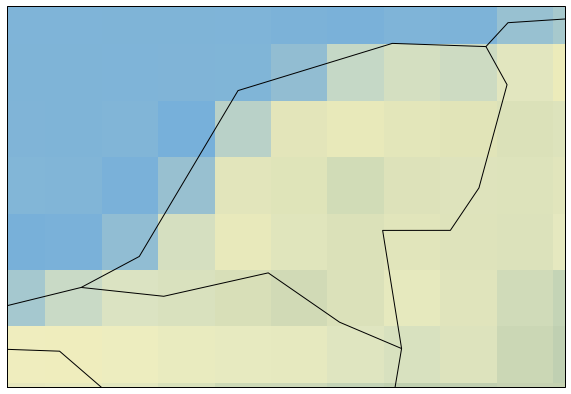

In [24]:
extent = [2.658691, 7.602539, 50.464498, 53.839564]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.stock_img();

## Improving the visualization
Doesn't that look aweful. The stock_img does not have a high enough resolution to be useful at this zoom level. 
There are some alternatives to have a better projection on the map. For example we an use the a tiled layer, so we can have a nice resolution for each zoom level. The way to do that is to first import the correct image tiles from the Stamen tile server, these tiles are combined into a single image, which you can use in the cartopy figure. See this online [example](https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html) and the example of the United Kingdom below. 

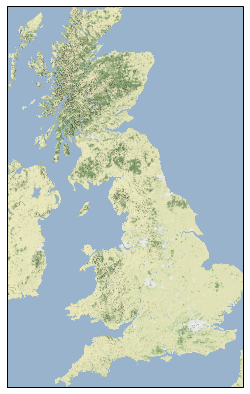

In [12]:
extent = [-7.57216793459, 1.68153079591, 49.959999905, 58.6350001085]

stamen_terrain = cimgt.Stamen('terrain-background')

ax = plt.axes(projection=stamen_terrain.crs)
ax.set_extent(extent, crs=ccrs.Geodetic())
ax.add_image(stamen_terrain, 8)

## Adding your own data
In addition to adding features from cartopy itself. You can get your own data an display it on the map. 
You can display features by using the function 'add_feature'. These feature can be points, lines and polygons. 

Furthermore raster layers can also be displayed. An easy example is by using a wmts layer, and simply call the function "add_wmts". See example below (adopted from [here](https://ocefpaf.github.io/python4oceanographers/blog/2014/09/29/exploring_new_cartopy/))

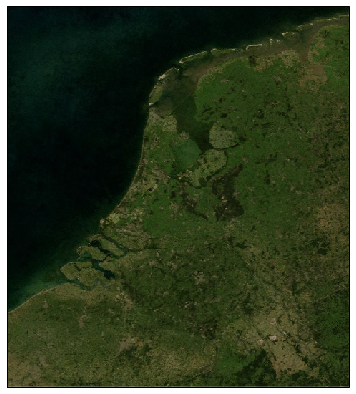

In [28]:
extent = [2.658691, 7.602539, 50.464498, 53.839564]
stamen_terrain = cimgt.Stamen('terrain-background')

ax = plt.axes(projection=stamen_terrain.crs)
ax.set_extent(extent, crs=ccrs.Geodetic())
ax.add_wmts('http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi', 'BlueMarble_ShadedRelief')

## Exercise 3.3 Add your own shapefile
But what is more interesting is that you can add your own data. For example an shapefile. Use the shapefile provided for this course: ../data/deelstroomgebieden/deelstroomgebieden_v.shp.
A few steps are needed to add your own shapfile. FIrst of all, you need to read the shapefile. This can be done by using the [Shapereader](https://scitools.org.uk/cartopy/docs/v0.15/tutorials/using_the_shapereader.html) of cartopy. 
From this step you need to make a [ShapelyFeature](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html) to add this to the map. 

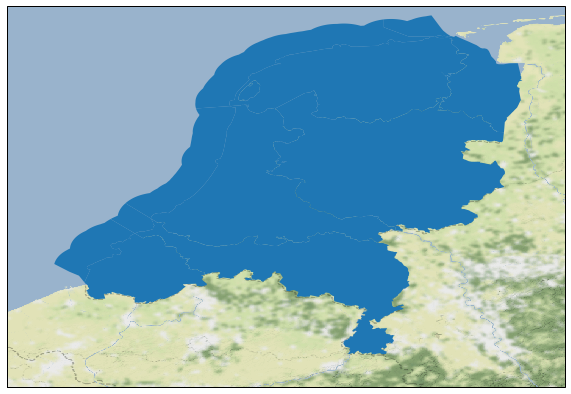

In [19]:
shpfilename = r'../data/deelstroomgebieden/deelstroomgebieden_v.shp'
reader = shpreader.Reader(shpfilename)
shape_feature = ShapelyFeature(reader.geometries(), ccrs.epsg(28992))
extent = [2.658691, 7.602539, 50.464498, 53.839564]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_image(stamen_terrain, 8)
ax.add_feature(shape_feature)

Now the shapefile is on the map and the features are all displayed in the same color. 
There are quite a lot of styling options for the different features. Because the features are plots made by matplotlib, we can use the styling we did in the first exercise of this course, using the attributes of the ['add_geometries'](https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/geoaxes.html) function. In the example below we changed the color of a simple feature. 

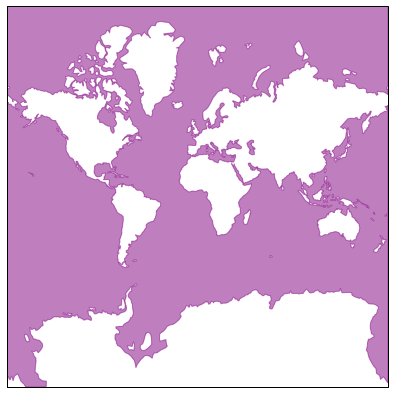

In [15]:
stamen_terrain = cimgt.Stamen('terrain-background')

ax = plt.axes(projection=stamen_terrain.crs)
ax.add_feature(cartopy.feature.OCEAN, color="purple", edgecolor="blue", alpha=0.5)


## Exercise 3.4 Style your own data
Style the data you used in exercise 3.3 to your liking. Change the colors and  make a legend.

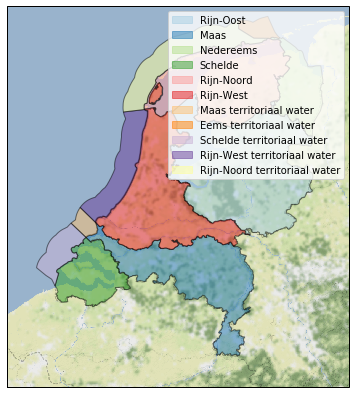

In [29]:
plt.rcParams["figure.figsize"]=20,7

transects = reader.records()
transect = next(transects)

stamen_terrain = cimgt.Stamen('terrain-background')

ax = plt.axes(projection=stamen_terrain.crs)
ax.set_extent(extent, crs=ccrs.Geodetic())
ax.add_image(stamen_terrain, 8)

handles = []
for record, geoms, color in zip(reader.records(), reader.geometries(), cm.Paired(np.arange(0, 11))):
    name = record.attributes['NAMETEXT']
    ax.add_geometries([geoms], ccrs.epsg(28992), facecolors=color, edgecolor='black', alpha=0.5)
    handle = mpatches.Patch(color=color, alpha=0.5, label=name)
    handles.append(handle)
ax.legend(handles=handles)